Title: Dynamic Properties of Networks
Author: Thomas M. Breuel
Institution: UniKL

In [1]:

from pylab import *

# Dynamics of Networks

(Examples of Networks)

In this chapter, we consider the dynamics of networks. Most of our examples will be from the dynamics of interacting neurons. However, the same phenomena occur in many other kinds of networks:

- social networks and interactions
- economic networks and interactions
- TCP/IP networks and network components

(Examples of Variables)

- message sent by user at time $t$
- packet rates by time
- number of visitors by time
- response time of system
- price of a stock or commodity
- number of friends in a social network

(Phenomena)

Common phenomena are:

- emergence 
- oscillations
- synchronization
- entrainment
- chaos

These occur even if individual network components are non-oscillatory and deterministic, and in systems with both continuous and discrete time.

(Practical Significance)

These phenomena have enormous practical significance. For example:

- network components designed to for the average case may face excessive peak loads under synchronization and entrainment
- chaotic behavior makes it nearly impossible to predict the future in systems like the economy, weather, network behavior
- entrainment and chaos both play roles in brain function and disease

We will primarily focus on _networks of neurons_ today.

# Networks of Integrate and Fire Neurons

Oscillations are observed widely throughout the nervous system.
We have previously seen oscillatory behavior in individual neurons.
It turns out that oscillatory behavior can also arise in networks of neurons, even spontaneously.

This kind of oscillatory behavior is common in many other systems, including economic systems, computer networks, etc.
It can be induced even by weak or sparse coupling between individual system components.

Let us start with a simple network of weakly coupled integrate-and-fire neurons.
As you can see, although the neurons start out firing synchronously and firing causes positive feedback, the synchronicity is actually lost over time.



In [2]:
# weakly coupled integrate-and-fire neurons
N = 1000
state = 0.001*rand(N)
coupling = 0.001*rand(N,N)
activity = []
for trial in range(5000):
    state += 0.01*rand(N)
    output = (state>1.0)
    state[output] = 0.0
    state += dot(coupling,output)
    activity.append(sum(output))
print amin(activity),amax(activity)

0 653


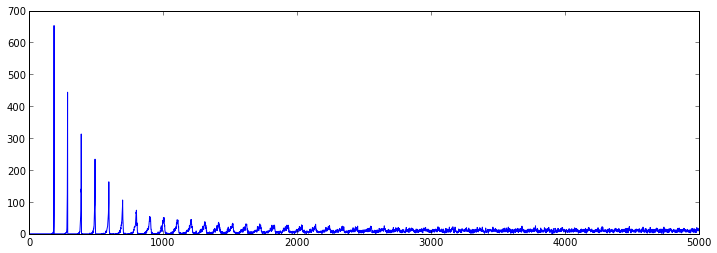

In [3]:
# weakly coupled integrate-and-fire neurons
figsize(12,4)
plot(activity)

We can achieve synchronicity by introducing a short refractory period after a neuron fires.
This leads to global synchronization even if neurons start out in completely unsynchronized states.



In [4]:
N = 1000
state = rand(N)
tref = 5
refr = zeros(N)
coupling = 0.001*rand(N,N)
activity = []
for trial in range(5000):
    state += 0.01*rand(N)
    refr = maximum(0,refr-1)
    output = (state>1.0)
    refr[output] = tref
    state[refr>0] = 0.0
    state += dot(coupling,output)
    activity.append(sum(output))
print amin(activity),amax(activity)

0 634


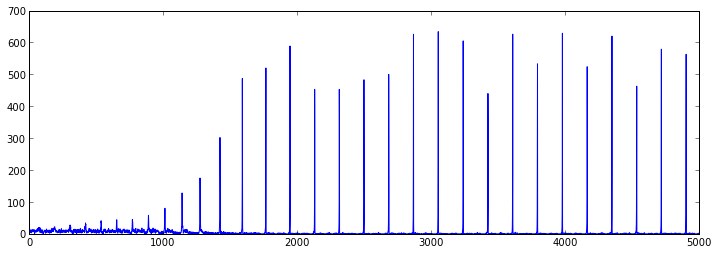

In [5]:
# weakly coupled integrate-and-fire neurons with refractory period
plot(activity)

We can look at the shape of an individual peak. We see an exponential growth of neurons firing, as each firing triggers even more neurons to fire. Then, however, all neurons cease simultaneously and their internal state variables start from zero again.



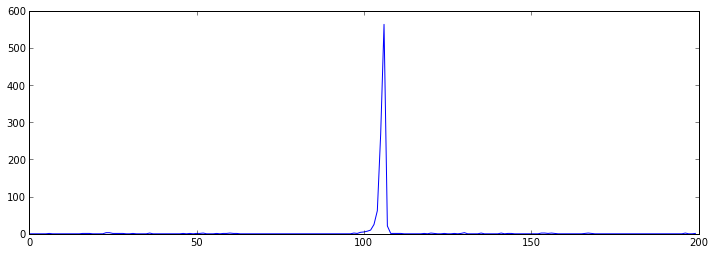

In [6]:
plot(activity[4800:5000])

The refractory period allows neurons to be reset to zero after a peak has happened. 

The refractory period needs to be about as long as the peak itself is wide.

If the refractory period is not present, neurons active during the peak will partially activate subsequent neurons, leaving the population with a mix of initial conditions.

If the refractory period is present, neurons active during the peak will only become sensitive again after most other neurons have stopped firing, so the active population will start with a similar phase value or internal state, causing synchronization.

(Remember)

Synchronization can occur as a result of weak interactions in a network and refractory periods.

# Van der Pol Oscillator

Synchronization can also occur by weak coupling of non-linear oscillators. 

In fact, with nonlinear oscillators, we can see a stronger phenomenon, namely _entrainment_, where oscillators of different frequencies adjust not just their _phase_ but also their _frequency_.

(History)

Synchronization and entrainment were first observed with pendulum clocks. 

They tend to have slightly different frequencies and different phases, but they would synchronize when placed on the same table.



Let's start with the van der Pol oscillator.

Remember that the van der Pol oscillator is a parameter choice for the FitzHugh-Nagumo model, and hence the phenomena described here also apply to interacting neurons.

The differential equations are:

$$ \dot{x} = y $$
$$ \dot{y} = \mu (1-x^2) y - x $$

Here, $\mu$ is a parameter that determines the form of the oscillations. For $\mu=0$, we get regular harmonic oscillations.

The effect off the _non-linear damping_ is to add energy to the system if there is too little energy in the system, and to remove energy from the system if there is too much present.

In [7]:
# van der Pol oscillator
x,y = 2,-4 # 0.1,0.2
mu = 1.0
s = 0.01
l = []
for i in range(10000):
    dx = y
    dy = mu * (1-x**2) * y - x
    x += dx*s
    y += dy*s
    l.append((x,y))
l = array(l)

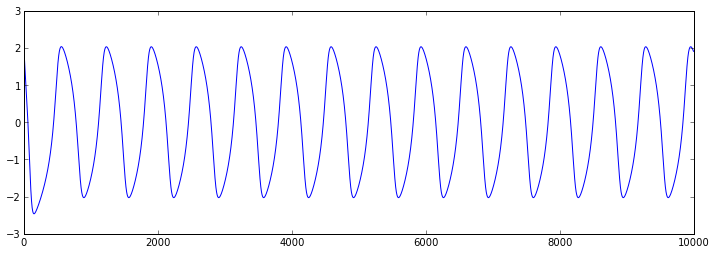

In [8]:
# output from the van der Pol oscillator
plot(l[:,0])

As usual, we can plot this in phase space.

The first nullcline is trivial:

$$ \dot{x} = y = 0 $$

The second nullcline is quite interesting:

$$ \dot{y} = \mu (1-x^2) y - x = 0 $$

or

$$ y = \frac{x}{\mu (1-x^2)} $$

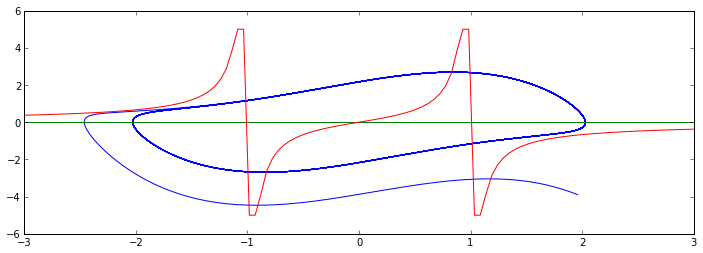

In [9]:
# van der Pol oscillator in phase space
plot(l[:,0],l[:,1])
xs = linspace(-3,3,117)
plot(xs,0*xs)
plot(xs,clip(xs/(1-xs**2)/mu,-5,5))

# Coupled van der Pol Oscillators

Let's look at two van der Pol oscillators running independently, with different starting points and different $\mu$ parameters (frequencies). As you can see, if these run independently, there is no fixed relationship between the two oscillators.



In [10]:
# uncoupled van der Pol oscillators
N = 2
x,y = randn(N),randn(N)
mu = 1+0.5*arange(N)
s = 0.1
l = []
for i in range(20000):
    dx = y
    dy = mu * (1-x**2) * y - x
    x += dx*s
    y += dy*s
    l.append(x.copy())
l = array(l)

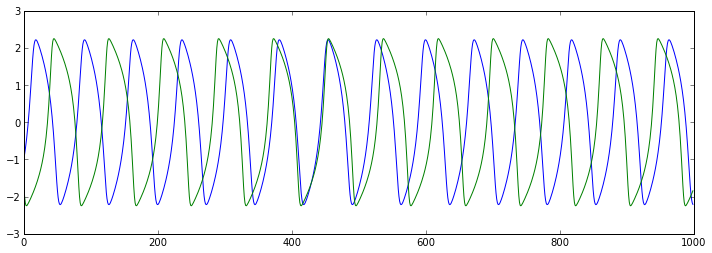

In [11]:
# uncoupled van der Pol oscillators
plot(l[-1000:,0])
plot(l[-1000:,1])

We can actually plot one oscillator against the other. The dense filling of space tells us again that there is no fixed relationship.



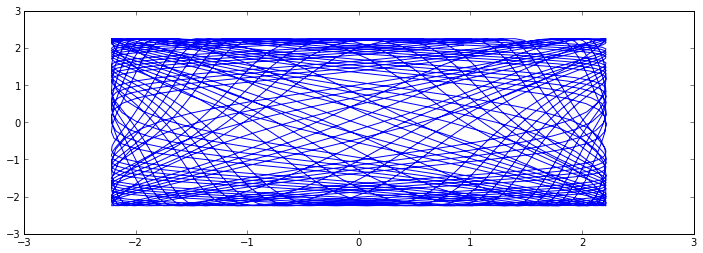

In [12]:
# uncoupled van der Pol oscillators (trajectory)
plot(l[-3000:,0],l[-3000:,1])

Now we introduce a small amount of mutual coupling between the two. As you can see, this causes both the frequency and the phase of the two oscillators to align.



In [13]:
# coupled van der Pol oscillators
N = 2
x,y = 1.0+arange(N),0.0+arange(N)
mu = 1+1.5*arange(N)
s = 0.1
l = []
for i in range(10000):
    dx = y
    dy = mu * (1-x**2) * y - x + 0.4*roll(dx,1)
    x += dx*s
    y += dy*s
    l.append(x.copy())
l = array(l)

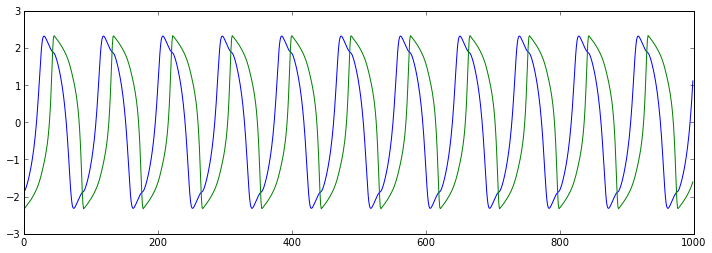

In [14]:
# output from coupled van der Pol oscillators
plot(l[-1000:,0])
plot(l[-1000:,1])

When coupling leads to agreement of the frequency of two oscillators (at some fixed phase), it is called _entrainment_ of the two oscillators. It is a common phenomenon in dynamical systems.

You can actually try to synchronize your brainwaves to an external source (or another person's brainwaves) in a process also called _entrainment_.

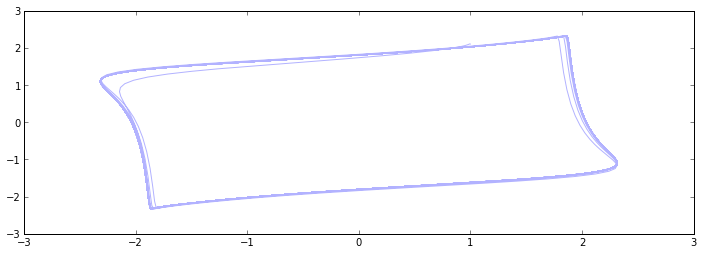

In [15]:
# entrainment in phase space
plot(l[:,0],l[:,1],c=(0,0,1,0.3))

(Summary)

Weak coupling of nonlinear oscillators can lead to _entrainment_, the synchronization of both phase and frequency of the two oscillators.

# Deterministic Chaos

## Forced van der Pol Oscillator

Above, the two van der Pol oscillators were coupled weakly and symmetrically.

We can also use one oscillator to _drive_ the other oscillator strongly.

In that case we get _chaotic behavior_.



In [16]:
# forced van der Pol oscillator
N = 2
x,y = 1.0+arange(N),0.0+arange(N)
mu = 1+1.5*arange(N)
s = 0.1
l = []
for i in range(10000):
    dx = y
    dy = mu * (1-x**2) * y - x 
    dy += 2.0 * roll(dx,1)*(arange(N)>0) # COUPLING
    x += dx*s
    y += dy*s
    l.append(x.copy())
l = array(l)

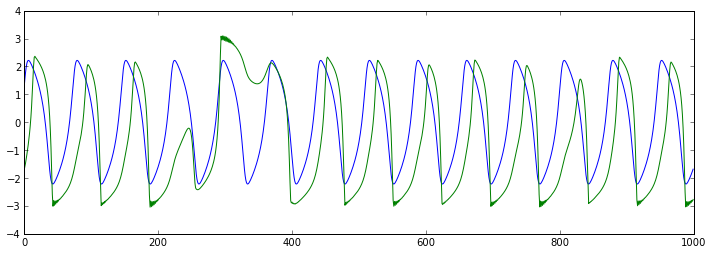

In [17]:
# chaotic behavior of forced van der Pol oscillator
plot(l[-1000:,0])
plot(l[-1000:,1])

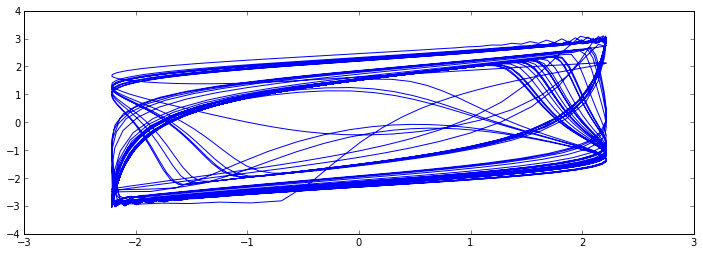

In [18]:
# forced oscillator in phase space
plot(l[-3000:,0],l[-3000:,1])

The forced van der Pol oscillator was the first system where deterministic chaos was observed.

Van der Pol had built an electronic oscillator out of vacuum tubes and listening to the signal.

When he tried to drive that oscillator with another oscillator, at certain parameter choices, noise was heard, instead of interference or "beating" between the oscillators.

(Summary)

Strong forcing of a non-linear oscillator can lead to chaotic dynamics.

Chaotic behavior is similar to true randomness.

## Lorenz Attractor and Chaos

The Lorentz system is another differential equation with chaotic behavior.

It occurs in weather and climate modeling, as well as many other areas of science and economics.

It has three time-dependent variables and is given by:

$$ \dot{x} = \sigma(y-x) $$
$$ \dot{y} = x(\rho-z)-y $$
$$ \dot{z} = xy - \beta z $$

In [19]:
# Lorenz system
x,y,z = 1.0,2.0,0.0
sigma,beta,rho = 10.0,8.0/3,28.0
s = 0.001
l = []
for i in range(100000):
    dx = sigma*(y-x)
    dy = x*(rho-z)-y
    dz = x*y-beta*z
    x = clip(x+dx*s,-1e3,1e3)
    y = clip(y+dy*s,-1e3,1e3)
    z = clip(z+dz*s,-1e3,1e3)
    l.append((x,y,z))
l = array(l)

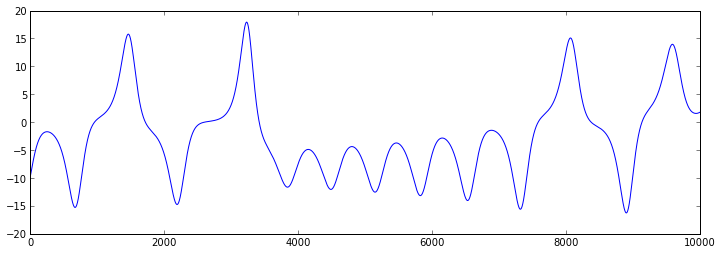

In [20]:
# trajectory of Lorenz system
plot(l[-10000:,0])

The usual way of plotting this is in three-dimensional phase space.

Note that these phase space trajectories never converge to a single _limit cycle_ as they do for other oscillators.

Instead, they move around in a lower dimensional subspace, a _strange attractor_.



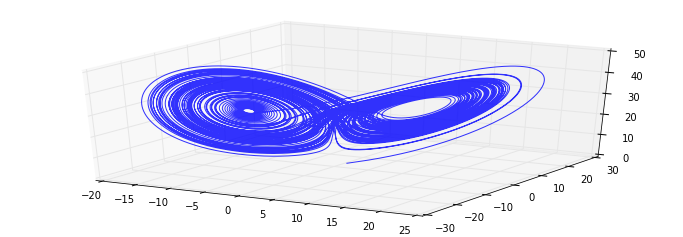

In [21]:

from mpl_toolkits.mplot3d.axes3d import Axes3D
ax = gcf().add_subplot(1, 1, 1, projection='3d')
figsize(8,8)
ax.plot(l[:,0],l[:,1],l[:,2],color=(0,0,1,0.8))

Let's simulate multiple paths with slightly different initial conditions.

This shows _sensitivity to initial conditions_ or the _butterfly effect_.



In [22]:
N = 10
x,y,z = ones(N)+1e-6*arange(N),zeros(N),zeros(N)
sigma,beta,rho = 10.0,8.0/3,28.0
s = 0.001
l = []
for i in range(100000):
    dx = sigma*(y-x)
    dy = x*(rho-z)-y
    dz = x*y-beta*z
    x = clip(x+dx*s,-1e3,1e3)
    y = clip(y+dy*s,-1e3,1e3)
    z = clip(z+dz*s,-1e3,1e3)
    l.append(x.copy())
l = array(l)

With this simulation, initially, the trajectories are close together.



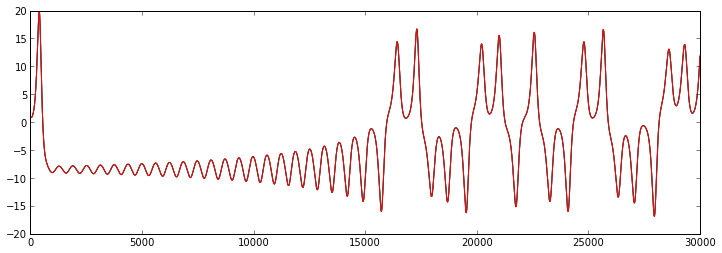

In [23]:
figsize(12,4)
plot(l[:30000,0]); plot(l[:30000,1]); plot(l[:30000,-1])

But they soon start to diverge.
Note that there is a point near the beginning where one path goes into a completely different direction from the others.



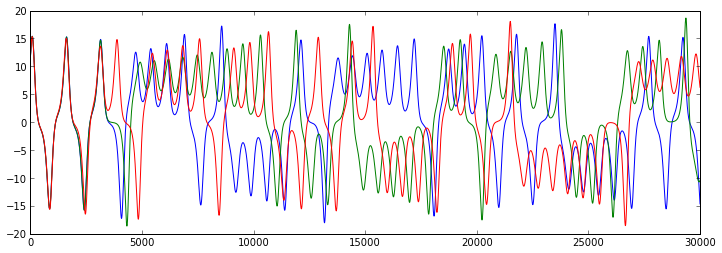

In [24]:
figsize(12,4)
t = 30000
plot(l[t:t+30000,0]); plot(l[t:t+30000,1]); plot(l[t:t+30000,-1])

Eventually, the trajectories have all largely diverged.



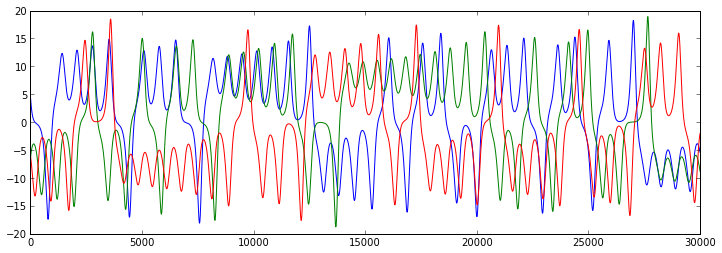

In [25]:
figsize(12,4)
plot(l[-30000:,0]); plot(l[-30000:,1]); plot(l[-30000:,-1])

(Summary)

The Lorenz equations describe a chaotic dynamical system.

These equations exhibit _sensitive dependence to initial conditions_, an important aspect of chaotic behavior.

(Note)

Not all sensitive dependence to initial conditions results in chaos.

For example, the equation $\dot{x} = r\;x$ also has sensitive dependence to initial conditions (leading to exponential growth), but the behavior is not chaotic.

## Lotka-Volterra Equations

The van der Pol oscillator and Lorentz equations both may seem a little obscure and complicated. 

Even simpler systems can exhibit chaos. Of those, the Lotka-Volterra equations are the most important, since they describe the behavior of many kinds of systems in economics, social networks, e-commerce, etc.

In [26]:
# Lotka-Volterra Equations
x = 0.1
y = 0.1
s = 0.01
l = []
for i in range(10000):
    dx = x * (1-y)
    dy = -0.3 * y * (1-x)
    x += dx * s
    y += dy * s
    l.append((x,y))

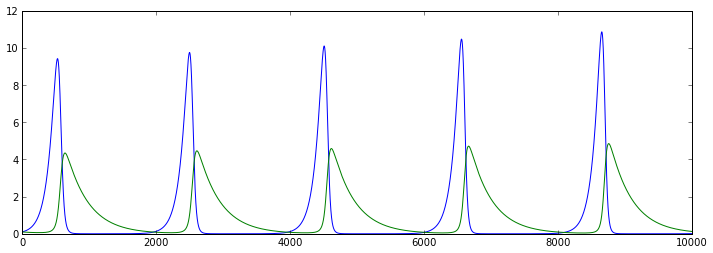

In [27]:
# Lotka-Volterra Output
l = array(l)
plot(l)

We can extend the Lotka-Volterra equations to multiple species and make them competitive.

That is, the change in population $x$ is given by:

$$ \dot{x_i} = r \; x_i \; (1 - x_i - \sum \beta_j x_j) $$

That is, in addition to the regular growth limiting factor $1-x_i$, growth is also limited by competition from other species.

In [28]:
# competitive Lotka-Volterra equations
N = 4
x = rand(N)
r = array([1,.72,1.53,1.27])
M = array([[1,1.09,1.52,0],[0,1,0.44,1.36],[2.33,0,1,0.47],[1.21,0.51,0.35,1]])
print M
s = 0.1
l = []
for i in range(50000):
    dx = r * x * (1-dot(M,x))
    x += dx * s
    l.append(x.copy())

[[ 1.    1.09  1.52  0.  ]
 [ 0.    1.    0.44  1.36]
 [ 2.33  0.    1.    0.47]
 [ 1.21  0.51  0.35  1.  ]]


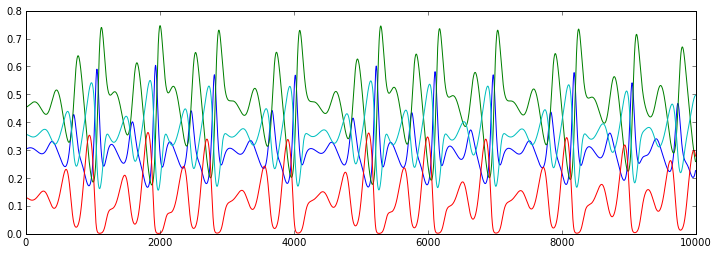

In [29]:
# competitive Lotka-Volterra equations behavior
l = array(l)
_=plot(l[-10000:])

We can also plot this in a higher dimensional phase space, and we see a strange attractor again. (We're starting the plot at $t=10000$ after the transients have settled.)



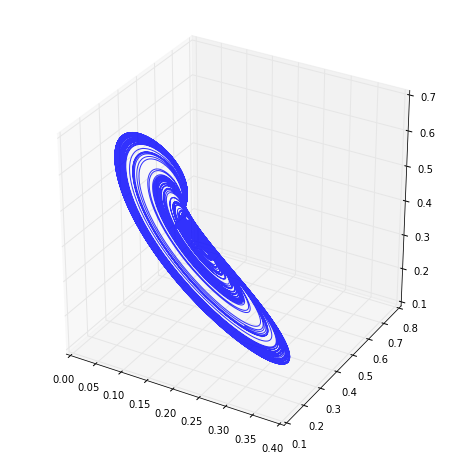

In [38]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
ax = gcf().add_subplot(1, 1, 1, projection='3d')
figsize(8,8)
ax.plot(l[10000:,2],l[10000:,1],l[10000:,0],color=(0,0,1,0.8))

(Summary)

Simple competitive growth (as occurs in economics, markets, ecology, and many other fields) can lead to chaotic behavior.

## Chaotic Difference Equations

All the above models are differential equation models, or smooth, continuous dynamical systems.

(We simulate them as difference equations but choose the step size small enough to get continuous trajectories).

However, even simple difference equations can exhibit chaotic behavior.

These are some of the simplest dynamical models exhibiting chaos.

(Ricker's Map)

Ricker's map simulates bounded growth:

$$ x_{t+1} = x_t \; e^{r(1-x_t/k)} $$

The growth rate is given by $ e^{r(1-x/k)} - 1$.

Once the population goes above $k$, growth rates become negative and the population declines

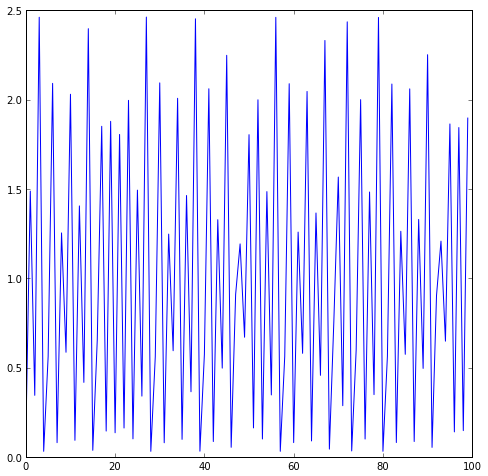

In [31]:
# Ricker's map
xs = []
x = 0.1
k = 1.0
r = 3.0
for i in range(100):
    xs.append(x)
    x = x * exp(r*(1-x/k))
plot(xs)

(Logistic Map)

An even simpler example is the logistic map, a discrete analog of the Lotka-Volterra equations and purely a polynomial:

$$ x_{t+1} = r \; x_t \; (1-x_t) $$

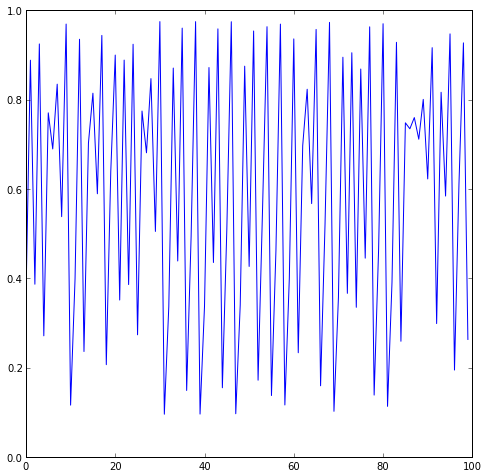

In [32]:
# Logistic map
xs = []
x = 0.1
r = 3.9
for i in range(100):
    x = r * x * (1-x)
    xs.append(x)
plot(xs)

(Summary)

Chaotic behavior can occur even in simple discrete time systems and with polynomial difference equations like the logistic map.

# Chaos and Near Chaos in Cellular Automata

There is another system where chaotic behavior can be observed, namely cellular automata.

Chaos appears even in the simplest kind of cellular automata.

In [33]:
# Generic Rule N implementation
def rule_n(a,n):
    m = array([(n&(1<<i)!=0) for i in range(8)],'i')
    s = array(4*roll(a,1)+2*a+roll(a,-1),'i')
    return m[s]    

In [34]:
# run a 1D cellular automaton through several iterations
def run(n,initial=None):
    if initial is not None:
        a = initial
    else:
        a = zeros(500)
        a[350] = 1
    result = []
    for i in range(400):
        result.append(a.copy())
        a = rule_n(a,n)
    return array(result)

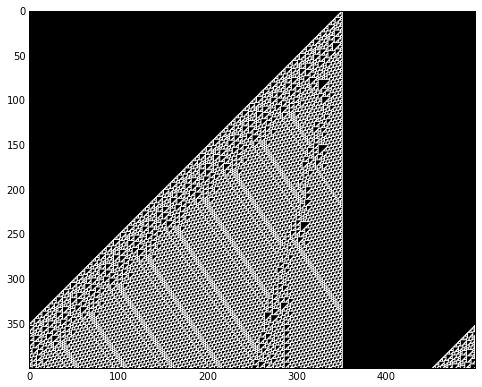

In [35]:
# Rule 110 is at the edge of chaos
gray(); figsize(12,12)
imshow(run(110))

(Rule 110 and the Border of Chaos)

- Rule 110 generates complex patterns with hard to predict behavior, but not quite chaotic patterns.
- Small disturbances cause large divergences in states over time, but not necessarily complete divergence.
- Rule 110 is computationally universal.

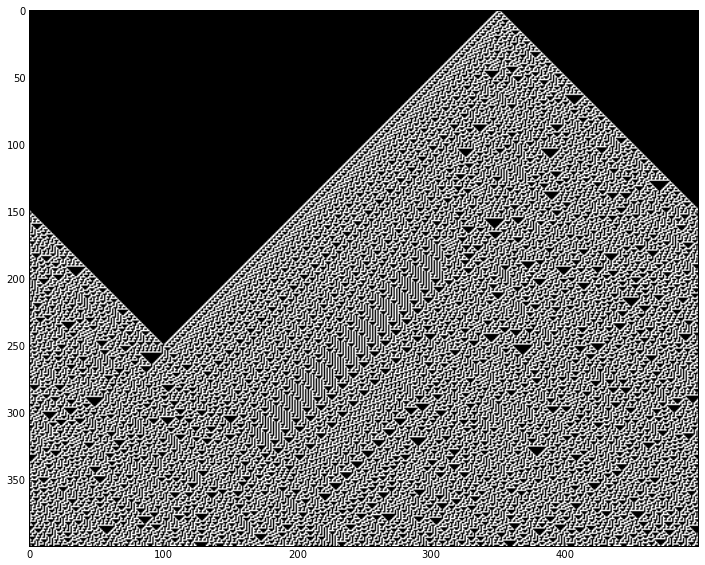

In [36]:
# Rule 30 is chaotic
gray(); figsize(12,12)
imshow(run(30))

(Rule 30 and Chaos)

- Rule 30 exhibits sensitive dependency on initial conditions
- there are many periodic patterns, and these are _dense_ in the space of all patterns
- is is _mixing_, that is, any finite pattern can be reached from any other finite pattern
- local structure is quickly destroyed

(Classification of Cellular Automata)

- class 1: initial structure is quickly destroyed, and the final state is stable and homogeneous
- class 2: initial structure is partially destroyed, interactions are local, and final states are stable or periodic
- class 3: initial structure is quickly destroyed, and the system exhibits chaotic behavior
- class 4: initial structure can survive for a long time, but there are also islands of complex and chaotic behavior

(Classification of Cellular Automata)

- conjecture: only class 4 is computationally universal
- these classes are heuristic/observational
- attempts to formalize them yield uncomputable criteria

# Summary

(Kinds of Behavior)

- oscillation
- synchronization
- entrainment
- chaos
- edge of chaos
- computational universality

(Main Message)

Even random networks of simple components with simple interactions can exhibit much more complex behaviors than the individual components.

These kind of behaviors are called _emergent behaviors_.

These complex phenomena occur in many areas of computer science, social systems, and economics.

(Questions)

Think about the kinds of software systems you create.

Where do you make assumptions about average cases or statistical independence?

Where is there a potential for weak coupling?

Where is there a potential for chaos?